<a href="https://colab.research.google.com/github/mkalokhina/practical_2_Kalokhina_Marharyta/blob/main/practical_2_Kalokhina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зчитати датасет ВВП(млню долю США) за країнами з Вікіпедії за посиланням (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
gdp_df = tables[2]


Вивести 5 рядків дватасета

In [ ]:
gdp_df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

Визначити розмір датасета

In [ ]:

gdp_df.shape

(210, 7)

3. Визначити оптимальну кількість стовпців

In [ ]:
gdp_df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

4. Змінити назви стовпців на більш зручні

In [ ]:
gdp_df.columns = gdp_df.columns.droplevel(0)

print(gdp_df.head())

  Country/Territory   Forecast       Year   Estimate       Year   Estimate  \
0             World  109529216       2024  105435540       2023  100834796   
1     United States   28781083       2024   27360935       2023   25744100   
2             China   18532633  [n 1]2024   17794782  [n 3]2023   17963170   
3           Germany    4591100       2024    4456081       2023    4076923   
4             Japan    4110452       2024    4212945       2023    4232173   

        Year  
0       2022  
1       2022  
2  [n 1]2022  
3       2022  
4       2022  


In [ ]:
gdp_df = gdp_df.drop(gdp_df.columns[[2, 4, 6]], axis=1)
print(gdp_df.head())

  Country/Territory   Forecast   Estimate   Estimate
0             World  109529216  105435540  100834796
1     United States   28781083   27360935   25744100
2             China   18532633   17794782   17963170
3           Germany    4591100    4456081    4076923
4             Japan    4110452    4212945    4232173


In [ ]:

new_column_names = {0: 'Country', 1: 'IMF', 2: 'World Bank', 3: 'UN'}

gdp_df.columns = [new_column_names.get(i, col) for i, col in enumerate(gdp_df.columns)]

print(gdp_df.head())

         Country        IMF World Bank         UN
0          World  109529216  105435540  100834796
1  United States   28781083   27360935   25744100
2          China   18532633   17794782   17963170
3        Germany    4591100    4456081    4076923
4          Japan    4110452    4212945    4232173


In [ ]:
gdp_df.head()

,Country,IMF,World Bank,UN
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


Визначити тип даних

In [ ]:
print(gdp_df.dtypes)

Country       object
IMF           object
World Bank    object
UN            object
dtype: object


Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [ ]:
print(gdp_df.isnull().sum())

Country       0
IMF           0
World Bank    0
UN            0
dtype: int64


In [ ]:
gdp_df.replace('—', float('nan'), inplace=True)

gdp_df['IMF'] = pd.to_numeric(gdp_df['IMF'], errors='coerce')
gdp_df['World Bank'] = pd.to_numeric(gdp_df['World Bank'], errors='coerce')
gdp_df['UN'] = pd.to_numeric(gdp_df['UN'], errors='coerce')

print("Типи дпних після конвертації:\n", gdp_df.dtypes)

print(gdp_df.head())

Типи дпних після конвертації:
 Country        object
IMF           float64
World Bank    float64
UN            float64
dtype: object
         Country          IMF   World Bank           UN
0          World  109529216.0  105435540.0  100834796.0
1  United States   28781083.0   27360935.0   25744100.0
2          China   18532633.0   17794782.0   17963170.0
3        Germany    4591100.0    4456081.0    4076923.0
4          Japan    4110452.0    4212945.0    4232173.0


In [ ]:
gdp_df = gdp_df.replace({'—': np.NAN})
gdp_df = gdp_df.fillna(gdp_df.mean(numeric_only=True), axis=0)
print(gdp_df.head)

<bound method NDFrame.head of               Country          IMF   World Bank           UN
0               World  109529216.0  105435540.0  100834796.0
1       United States   28781083.0   27360935.0   25744100.0
2               China   18532633.0   17794782.0   17963170.0
3             Germany    4591100.0    4456081.0    4076923.0
4               Japan    4110452.0    4212945.0    4232173.0
..                ...          ...          ...          ...
205          Kiribati        311.0        279.0        223.0
206             Palau        308.0        263.0        225.0
207  Marshall Islands        305.0        284.0        279.0
208             Nauru        161.0        154.0        147.0
209            Tuvalu         66.0         62.0         59.0

[210 rows x 4 columns]>


Перевірити наявність пропущених значень ще раз

In [ ]:
print(gdp_df.isnull().sum())

Country       0
IMF           0
World Bank    0
UN            0
dtype: int64


Вивести описову статистику датасету describe()

In [ ]:
print(gdp_df.describe())

                IMF    World Bank            UN
count  2.100000e+02  2.100000e+02  2.100000e+02
mean   1.123228e+06  1.037206e+06  9.612699e+05
std    7.900707e+06  7.602076e+06  7.275608e+06
min    6.600000e+01  6.200000e+01  5.900000e+01
25%    1.464775e+04  1.044175e+04  8.928250e+03
50%    6.215800e+04  4.341600e+04  3.210250e+04
75%    4.366365e+05  3.376592e+05  2.412485e+05
max    1.095292e+08  1.054355e+08  1.008348e+08


Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?

In [ ]:

gdp_df['Difference'] = gdp_df['IMF'] - gdp_df['World Bank']

# Знайдемо країни з найбільшим і найменшим відхиленням
max_diff_country = gdp_df.loc[gdp_df['Difference'].idxmax(), 'Country']
min_diff_country = gdp_df.loc[gdp_df['Difference'].idxmin(), 'Country']

print(f"Найбільше відхилення між MVF_2024 та WorldBank_2023 у країни: {max_diff_country}")
print(f"Найменше відхилення між MVF_2024 та WorldBank_2023 у країни: {min_diff_country}")


Найбільше відхилення між MVF_2024 та WorldBank_2023 у країни: World
Найменше відхилення між MVF_2024 та WorldBank_2023 у країни: South Sudan


Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?

In [ ]:

correlation = gdp_df[['IMF', 'World Bank', 'UN']].corr()
print("Кореляція між показниками:\n", correlation)

Кореляція між показниками:
                  IMF  World Bank        UN
IMF         1.000000    0.999351  0.999246
World Bank  0.999351    1.000000  0.999656
UN          0.999246    0.999656  1.000000


Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

In [ ]:
mean_values = gdp_df[['IMF', 'World Bank', 'UN']].mean()
print("Середнє значення:\n", mean_values)

Середнє значення:
 IMF           1.123228e+06
World Bank    1.037206e+06
UN            9.612699e+05
dtype: float64


Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [ ]:
gdp_df['StdDev'] = gdp_df[['IMF', 'World Bank', 'UN']].std(axis=1)

# Знайдемо країну з найбільшою варіативністю між роками
max_var_country = gdp_df.loc[gdp_df['StdDev'].idxmax(), 'Country']
print(f"Країна з найбільшою варіативністю показників між роками: {max_var_country}")


Країна з найбільшою варіативністю показників між роками: World


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

In [ ]:
max_MVF_2024 = gdp_df.loc[gdp_df['IMF'].idxmax(), 'Country']
min_MVF_2024 = gdp_df.loc[gdp_df['IMF'].idxmin(), 'Country']

max_WB_2023 = gdp_df.loc[gdp_df['World Bank'].idxmax(), 'Country']
min_WB_2023 = gdp_df.loc[gdp_df['World Bank'].idxmin(), 'Country']

max_OON_2022 = gdp_df.loc[gdp_df['UN'].idxmax(), 'Country']
min_OON_2022 = gdp_df.loc[gdp_df['UN'].idxmin(), 'Country']

print(f"Найвищий MVF_2024 у країни: {max_MVF_2024}, найнижчий у країни: {min_MVF_2024}")
print(f"Найвищий WorldBank_2023 у країни: {max_WB_2023}, найнижчий у країни: {min_WB_2023}")
print(f"Найвищий OON_2022 у країни: {max_OON_2022}, найнижчий у країни: {min_OON_2022}")

Найвищий MVF_2024 у країни: World, найнижчий у країни: Tuvalu
Найвищий WorldBank_2023 у країни: World, найнижчий у країни: Tuvalu
Найвищий OON_2022 у країни: World, найнижчий у країни: Tuvalu


.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

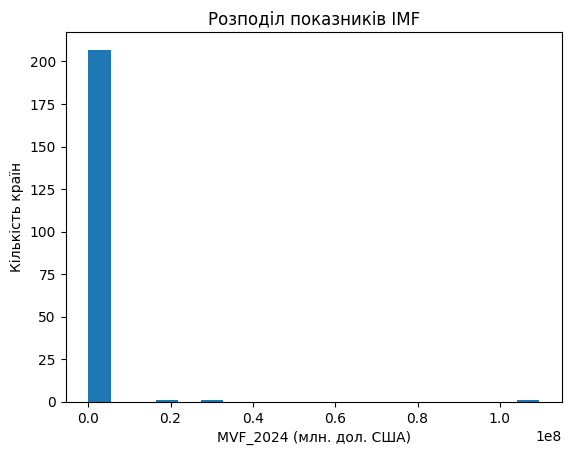

In [ ]:

import matplotlib.pyplot as plt

plt.hist(gdp_df['IMF'].dropna(), bins=20)
plt.title('Розподіл показників IMF')
plt.xlabel('MVF_2024 (млн. дол. США)')
plt.ylabel('Кількість країн')
plt.show()

Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

In [ ]:
gdp_df['Share_IMF'] = gdp_df['IMF'] / gdp_df['IMF'].sum()
gdp_df['Share_WB'] = gdp_df['World Bank'] / gdp_df['World Bank'].sum()
gdp_df['Share_UN'] = gdp_df['UN'] / gdp_df['UN'].sum()

print("Частки країн за роками:\n", gdp_df[['Country', 'Share_IMF', 'Share_WB', 'Share_UN']])

Частки країн за роками:
               Country     Share_IMF      Share_WB      Share_UN
0               World  4.643473e-01  4.840638e-01  4.995119e-01
1       United States  1.220169e-01  1.256165e-01  1.275302e-01
2               China  7.856878e-02  8.169741e-02  8.898532e-02
3             Germany  1.946389e-02  2.045826e-02  2.019612e-02
4               Japan  1.742619e-02  1.934200e-02  2.096519e-02
..                ...           ...           ...           ...
205          Kiribati  1.318479e-06  1.280914e-06  1.104690e-06
206             Palau  1.305761e-06  1.207456e-06  1.114597e-06
207  Marshall Islands  1.293042e-06  1.303869e-06  1.382100e-06
208             Nauru  6.825568e-07  7.070275e-07  7.282034e-07
209            Tuvalu  2.798059e-07  2.846475e-07  2.922721e-07

[210 rows x 4 columns]


Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

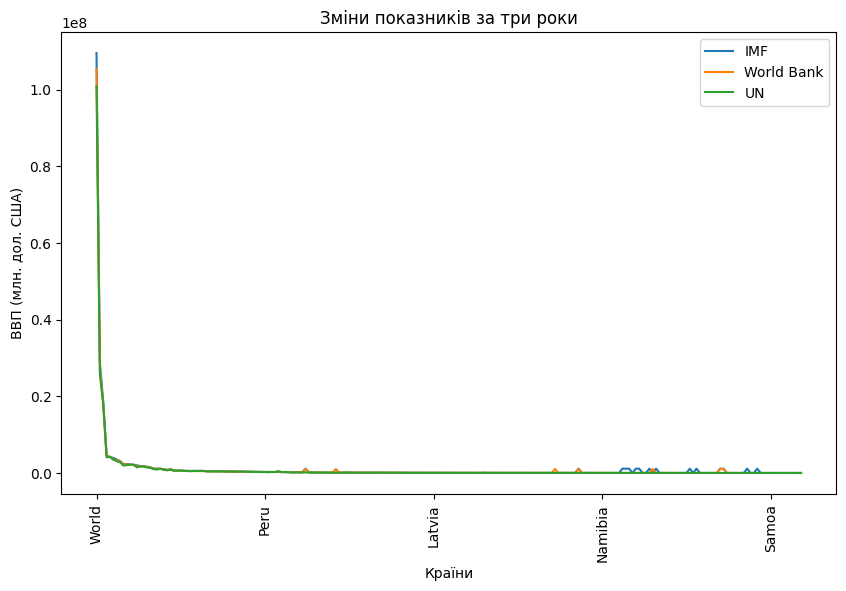

In [ ]:
gdp_df.set_index('Country')[['IMF', 'World Bank', 'UN']].plot(kind='line', figsize=(10, 6))
plt.title('Зміни показників за три роки')
plt.ylabel('ВВП (млн. дол. США)')
plt.xlabel('Країни')
plt.xticks(rotation=90)
plt.show()


ДРУГА ЧАСТИНА

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



# Прочитайте csv файл
file_path = '/content/drive/My Drive/titanic.csv'

df = pd.read_csv(file_path)

# Виведіть перші п'ять рядків
print(df.head())

Mounted at /content/drive
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


визначити розмірр датасета




In [ ]:
df.shape

(418, 12)

Визначити типи даних

In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


Ще раз перевірити наявність пропущених значень.

In [ ]:

print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Перевірити наявність дублікатів. При наявності видалити дублікати.

In [ ]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


Вивести описову статистику датасету describe()

In [ ]:

print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


Видалити стовпчик Cabin

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  


Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [ ]:
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df = df[selected_columns]
print(df.head())

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).

In [ ]:
print(df['Sex'].unique())

['male' 'female']


In [ ]:

df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)
print(df.head())


   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

In [ ]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


Вивести 5 перших рядків датасету.

In [ ]:

print(df.head())

   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


Вивести 5 останніх рядків датасету.

In [ ]:
print(df.tail())

     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

In [ ]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання за статтю:\n", survival_by_sex)

Відсоток виживання за статтю:
 Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання за класом:\n", survival_by_class)

Відсоток виживання за класом:
 Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

In [ ]:
mean_age_by_survival = df.groupby('Survived')['Age'].mean()
print("Середній вік за статусом виживання:\n", mean_age_by_survival)

Середній вік за статусом виживання:
 Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

In [ ]:
df['Fare_Group'] = pd.qcut(df['Fare'], 4, labels=False)
survival_by_fare_group = df.groupby('Fare_Group')['Survived'].mean() * 100
print("Відсоток виживання за групами тарифів:\n", survival_by_fare_group)

Відсоток виживання за групами тарифів:
 Fare_Group
0    26.315789
1    27.083333
2    39.047619
3    53.398058
Name: Survived, dtype: float64


Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

In [ ]:
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Середній тариф за класом:\n", mean_fare_by_class)

Середній тариф за класом:
 Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?

In [ ]:
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print("Середній вік за класом:\n", mean_age_by_class)

Середній вік за класом:
 Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

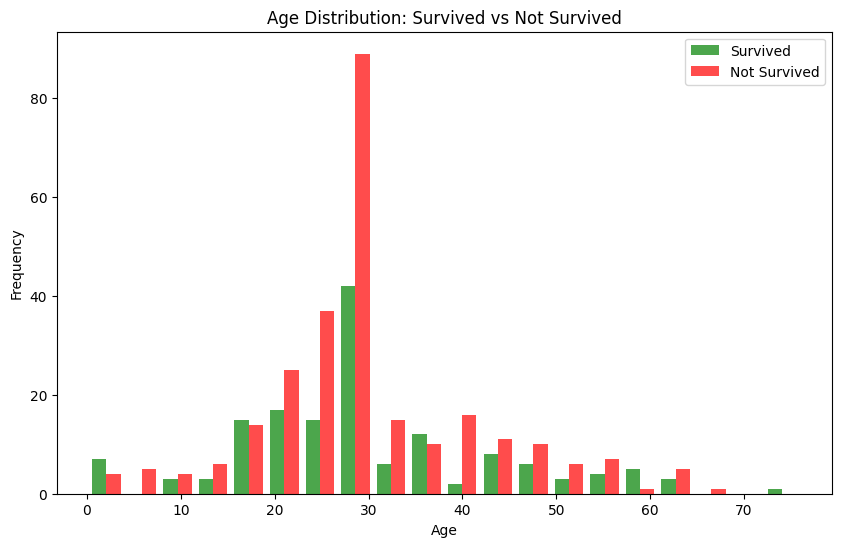

In [ ]:
# divide passengers into survivoures and deceased
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

# create plot
plt.figure(figsize=(10, 6))
plt.hist([survived, not_survived], bins=20, label=['Survived', 'Not Survived'], color=['green', 'red'], alpha=0.7)
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?

In [ ]:
survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print(survival_rate)

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


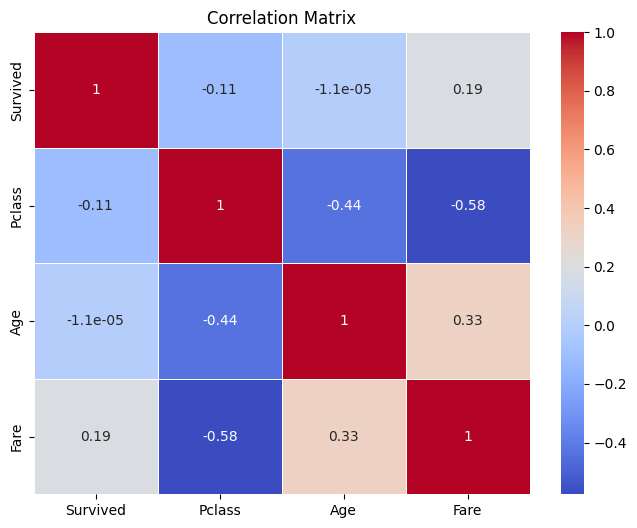

In [ ]:
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print(correlation_matrix)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Висновок: Результати аналізу показують, що пасажири з вищими тарифами мали кращі шанси на виживання. Більшість тих, хто вижив, становили жінки, тоді як чоловіки майже не були серед виживших. Це може вказувати на те, що під час рятувальних операцій жінкам надавали перевагу.